In [1]:
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np

In [3]:
# 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

In [4]:
# 단위근 검정 대상 컬럼 선택 (사용자 데이터에 맞게 수정)
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']

# 결과 저장 리스트
results = []

In [5]:
# 단위근 검정 수행 (ADF 및 PP 테스트)
for col in target_columns:
    if col in df.columns:  # 존재하는 열만 처리
        series = df[col].dropna()

        # ADF Test
        adf_test = ts.adfuller(series, autolag='AIC')
        adf_stat, adf_pval = adf_test[0], adf_test[1]

        # PP Test (KPSS)
        try:
            pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
            pp_stat, pp_pval = pp_test[0], pp_test[1]
        except ValueError:
            pp_stat, pp_pval = None, None  # 예외 처리 (값이 너무 커서 오류 발생할 경우)
        except ts.InterpolationWarning:
            pp_stat, pp_pval = None, None  # Interpolation 경고 발생 시 무시

        # 결과 저장
        results.append([col, adf_stat, adf_pval, pp_stat, pp_pval])
    else:
        print(f"Warning: Column '{col}' not found in dataset!")

# 결과 정리
results_df = pd.DataFrame(results, columns=['Series', 'ADF Statistic', 'ADF p-value', 'PP Statistic', 'PP p-value'])

# 결과 출력
print(results_df)  # 콘솔 출력
results_df.to_csv("unit_root_test_results.csv", index=False)  # CSV 파일로 저장

       Series  ADF Statistic  ADF p-value  PP Statistic  PP p-value
0     Finance      -2.898359     0.045539      0.369247        0.01
1       Banks      -2.947670     0.040079      0.340953        0.01
2   Insurance      -1.230289     0.660433      0.496155        0.01
3  Securities      -2.828830     0.054272      0.250202        0.01
4        KTB3      -2.161905     0.220361      0.298453        0.01
5       KTB10      -1.649420     0.457343      0.293199        0.01
6          M2       2.550659     0.999064      0.611622        0.01
7     KRW/USD      -1.719943     0.420868      0.252128        0.01


C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\1066824498.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\1066824498.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\1066824498.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\1066824498.py:12: InterpolationWarning: T

In [7]:
import pandas as pd
import statsmodels.tsa.stattools as ts

# 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

# 데이터 컬럼명 정리 (공백 제거)
df.columns = df.columns.str.strip()

# 실제 컬럼명 확인
print("Column Names:", df.columns)

# 중복된 변수명이 있는지 확인
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']
target_columns = list(set(target_columns))  # 중복 제거

# 단위근 검정 결과 저장 (중복 실행 방지)
results = []

for col in target_columns:
    if col in df.columns:  # 존재하는 열만 처리
        series = df[col].dropna()

        # ADF Test
        adf_test = ts.adfuller(series, autolag='AIC')
        adf_stat, adf_pval = adf_test[0], adf_test[1]

        # PP Test (KPSS)
        try:
            pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
            pp_stat, pp_pval = pp_test[0], pp_test[1]
        except ValueError:
            pp_stat, pp_pval = None, None  # 예외 처리
        except ts.InterpolationWarning:
            pp_stat, pp_pval = None, None  # Interpolation 경고 발생 시 무시

        # 결과 저장 (중복 추가 방지)
        results.append([col, adf_stat, adf_pval, pp_stat, pp_pval])
    else:
        print(f"Warning: Column '{col}' not found in dataset!")

# 결과 정리
results_df = pd.DataFrame(results, columns=['Series', 'ADF Statistic', 'ADF p-value', 'PP Statistic', 'PP p-value'])

# 중복된 데이터가 있는지 확인
print(results_df.duplicated().sum(), "중복 행 제거됨")

# 중복 제거
results_df = results_df.drop_duplicates()

# 결과 출력
print(results_df)  # 콘솔 출력
results_df.to_csv("unit_root_test_results.csv", index=False)  # CSV 파일로 저장


Column Names: Index(['Date', 'Finance', 'Banks', 'Insurance', 'Securities', 'Interest rate',
       'KTB3', 'KTB10', 'M2', 'KRW/USD'],
      dtype='object')
0 중복 행 제거됨
       Series  ADF Statistic  ADF p-value  PP Statistic  PP p-value
0     KRW/USD      -1.719943     0.420868      0.252128        0.01
1  Securities      -2.828830     0.054272      0.250202        0.01
2        KTB3      -2.161905     0.220361      0.298453        0.01
3     Finance      -2.898359     0.045539      0.369247        0.01
4   Insurance      -1.230289     0.660433      0.496155        0.01
5       KTB10      -1.649420     0.457343      0.293199        0.01
6          M2       2.550659     0.999064      0.611622        0.01
7       Banks      -2.947670     0.040079      0.340953        0.01


C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\2040771021.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\2040771021.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\2040771021.py:31: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pp_test = ts.kpss(series, regression='ct', nlags="auto")  # 추세 포함
C:\Users\kunwo\AppData\Local\Temp\ipykernel_20852\2040771021.py:31: InterpolationWarning: T

In [8]:
import pandas as pd
import numpy as np
import statsmodels.tsa.vector_ar.vecm as vecm

In [9]:
# 🔹 1. 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# 공적분 검정 대상 변수 선택 (논문에서 사용한 변수와 맞게 수정)
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']  
df = df[target_columns].dropna()  # 결측치 제거

In [11]:
vecm.VECM(endog=('Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD'), exog=('Banks', 'Insurance', 'Securities'), exog_coint=None, dates='month', freq=None, missing='none', k_ar_diff=2, coint_rank=2, deterministic='li', seasons=0, first_season=0)

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U10'), dtype('<U10')) -> None

In [12]:
vecm.coint_johansen(df, det_order=1, k_ar_diff=2)

In [13]:
vecm.JohansenTestResult()

TypeError: JohansenTestResult.__init__() missing 9 required positional arguments: 'rkt', 'r0t', 'eig', 'evec', 'lr1', 'lr2', 'cvt', 'cvm', and 'ind'

In [14]:
# 🔹 2. 공적분 검정 수행 (Johansen & Juselius Test)
coint_test = vecm.coint_johansen(df, det_order=1, k_ar_diff=2)

# 🔹 3. Trace Test 및 Maximum Eigenvalue Test 결과 저장
trace_test_results = coint_test.lr1  # Trace Statistic
trace_critical_values = coint_test.cvt  # Trace Test Critical Values (90%, 95%, 99%)

max_eigen_test_results = coint_test.lr2  # Maximum Eigenvalue Statistic
max_eigen_critical_values = coint_test.cvm  # Max Eigen Test Critical Values (90%, 95%, 99%)


In [15]:
# 🔹 4. 결과 표 생성
results = []

for i in range(len(trace_test_results)):
    results.append([
        i,  # 공적분 개수 (Rank)
        trace_test_results[i],  # Trace Statistic
        trace_critical_values[i][1],  # 5% 임계값 (Trace)
        "Reject" if trace_test_results[i] > trace_critical_values[i][1] else "Do not reject",
        max_eigen_test_results[i],  # Max Eigen Statistic
        max_eigen_critical_values[i][1],  # 5% 임계값 (Max Eigen)
        "Reject" if max_eigen_test_results[i] > max_eigen_critical_values[i][1] else "Do not reject"
    ])

# DataFrame 생성
results_df = pd.DataFrame(results, columns=[
    'Rank (r)', 'Trace Statistic', 'Trace 5% CV', 'Trace Test Result',
    'Max Eigen Statistic', 'Max Eigen 5% CV', 'Max Eigen Test Result'
])

# 🔹 5. 결과 출력 (논문 표 형식으로)
print(results_df)  # 콘솔 출력
results_df.to_csv("cointegration_test_results.csv", index=False)  # CSV 파일로 저장

   Rank (r)  Trace Statistic  Trace 5% CV Trace Test Result  \
0         0       175.055703     175.1584     Do not reject   
1         1       128.399782     139.2780     Do not reject   
2         2        88.490392     107.3429     Do not reject   
3         3        52.985673      79.3422     Do not reject   
4         4        31.518046      55.2459     Do not reject   
5         5        18.897879      35.0116     Do not reject   
6         6         9.051220      18.3985     Do not reject   
7         7         1.315598       3.8415     Do not reject   

   Max Eigen Statistic  Max Eigen 5% CV Max Eigen Test Result  
0            46.655920          55.7302         Do not reject  
1            39.909391          49.5875         Do not reject  
2            35.504719          43.4183         Do not reject  
3            21.467627          37.1646         Do not reject  
4            12.620168          30.8151         Do not reject  
5             9.846659          24.2522         

In [16]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts

In [17]:
# 🔹 1. 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# Granger 인과관계 검정 대상 변수 선택 (논문 기준)
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']
df = df[target_columns].dropna()  # 결측치 제거

In [18]:
# 🔹 2. 차분 적용 (단위근이 있는 경우)
df_diff = df.diff().dropna()  # 1차 차분 적용

# 🔹 3. Granger Causality Test 수행
max_lag = 2  # 논문에서 사용된 래그를 반영
results = []

for col_y in target_columns:  # 종속 변수
    for col_x in target_columns:  # 독립 변수
        if col_x != col_y:  # 자기 자신과의 관계는 제외
            test_result = ts.grangercausalitytests(df_diff[[col_y, col_x]], max_lag, verbose=False)
            
            # 최적 lag 선택 (AIC 기준)
            best_lag = min(test_result.keys(), key=lambda k: test_result[k][0]['params_ftest'][1])

            # F-statistic & p-value
            f_stat = test_result[best_lag][0]['params_ftest'][0]
            p_value = test_result[best_lag][0]['params_ftest'][1]

            # 귀무가설(H0): X는 Y를 Granger-cause 하지 않는다.
            result_text = "Reject" if p_value < 0.01 else "Do not reject"

            results.append([col_y + " does not Granger-cause " + col_x, f_stat, p_value, result_text])


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions shou

In [19]:
# 🔹 4. 결과 DataFrame 생성 (논문 스타일로 정리)
results_df = pd.DataFrame(results, columns=['Null Hypothesis', 'F-Statistic', 'p-value', 'Decision'])

# 🔹 5. 결과 출력
print(results_df)  # 콘솔 출력
results_df.to_csv("Granger_Causality_test_results.csv", index=False)  # CSV 파일로 저장

                                Null Hypothesis  F-Statistic   p-value  \
0          Finance does not Granger-cause Banks     0.716544  0.489321   
1      Finance does not Granger-cause Insurance     2.543246  0.111871   
2     Finance does not Granger-cause Securities     0.583945  0.558365   
3           Finance does not Granger-cause KTB3     2.580025  0.109323   
4          Finance does not Granger-cause KTB10     1.911025  0.149833   
5             Finance does not Granger-cause M2     0.285073  0.593810   
6        Finance does not Granger-cause KRW/USD     0.384296  0.535806   
7          Banks does not Granger-cause Finance     0.559660  0.572034   
8        Banks does not Granger-cause Insurance     0.885912  0.413478   
9       Banks does not Granger-cause Securities     0.596920  0.551196   
10            Banks does not Granger-cause KTB3     3.756722  0.053580   
11           Banks does not Granger-cause KTB10     2.128185  0.145709   
12              Banks does not Granger

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR

In [21]:
# 🔹 1. 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# Granger 인과관계 검정 대상 변수 선택 (논문 기준)
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']
df = df[target_columns].dropna()  # 결측치 제거


In [22]:
# 🔹 2. 로그 변환 후 1차 차분 적용 (log 변환 + 1차 차분)
df_log_diff = np.log(df).diff().dropna()

# 🔹 3. 최적 래그(lag) 선택 (AIC 기준)
var_model = VAR(df_log_diff)
selected_lag = var_model.select_order(maxlags=10).aic
print(f"Selected lag based on AIC: {selected_lag}")

Selected lag based on AIC: 1


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
# 🔹 4. Granger Causality Test 수행 (AIC 기반 최적 래그 사용)
results = []

for col_y in target_columns:  # 종속 변수
    for col_x in target_columns:  # 독립 변수
        if col_x != col_y:  # 자기 자신과의 관계는 제외
            test_result = ts.grangercausalitytests(df_log_diff[[col_y, col_x]], selected_lag, verbose=False)
            
            # F-statistic & p-value
            f_stat = test_result[selected_lag][0]['params_ftest'][0]
            p_value = test_result[selected_lag][0]['params_ftest'][1]

            # 귀무가설(H0): X는 Y를 Granger-cause 하지 않는다.
            result_text = "Reject" if p_value < 0.01 else "Do not reject"

            results.append([col_y + " does not Granger-cause " + col_x, selected_lag, f_stat, p_value, result_text])

# 🔹 5. 결과 DataFrame 생성 (논문 스타일로 정리)
results_df = pd.DataFrame(results, columns=['Null Hypothesis', 'Optimal Lag (AIC)', 'F-Statistic', 'p-value', 'Decision'])

# 🔹 6. 결과 출력
print(results_df)  # 콘솔 출력
results_df.to_csv("Granger_Causality_test_with_log_results.csv", index=False)  # CSV 파일로 저장

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions shou

                                Null Hypothesis  Optimal Lag (AIC)  \
0          Finance does not Granger-cause Banks                  1   
1      Finance does not Granger-cause Insurance                  1   
2     Finance does not Granger-cause Securities                  1   
3           Finance does not Granger-cause KTB3                  1   
4          Finance does not Granger-cause KTB10                  1   
5             Finance does not Granger-cause M2                  1   
6        Finance does not Granger-cause KRW/USD                  1   
7          Banks does not Granger-cause Finance                  1   
8        Banks does not Granger-cause Insurance                  1   
9       Banks does not Granger-cause Securities                  1   
10            Banks does not Granger-cause KTB3                  1   
11           Banks does not Granger-cause KTB10                  1   
12              Banks does not Granger-cause M2                  1   
13         Banks doe

C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

In [25]:
# 🔹 1. 엑셀 데이터 로드
file_path = "index.xlsx"
df = pd.read_excel(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# IRF 분석 대상 변수 선택 (논문 기준)
target_columns = ['Finance', 'Banks', 'Insurance', 'Securities', 'KTB3', 'KTB10', 'M2', 'KRW/USD']
df = df[target_columns].dropna()  # 결측치 제거

In [26]:
# 🔹 2. 로그 변환 후 1차 차분 적용 (log 변환 + 1차 차분)
df_log_diff = np.log(df).diff().dropna()

# 🔹 3. 최적 래그(lag) 선택 (AIC 기준)
var_model = tsa.VAR(df_log_diff)
selected_lag = var_model.select_order(maxlags=10).aic
print(f"Selected lag based on AIC: {selected_lag}")

# 🔹 4. VAR 모델 피팅
model = var_model.fit(selected_lag)

Selected lag based on AIC: 1


C:\Users\kunwo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


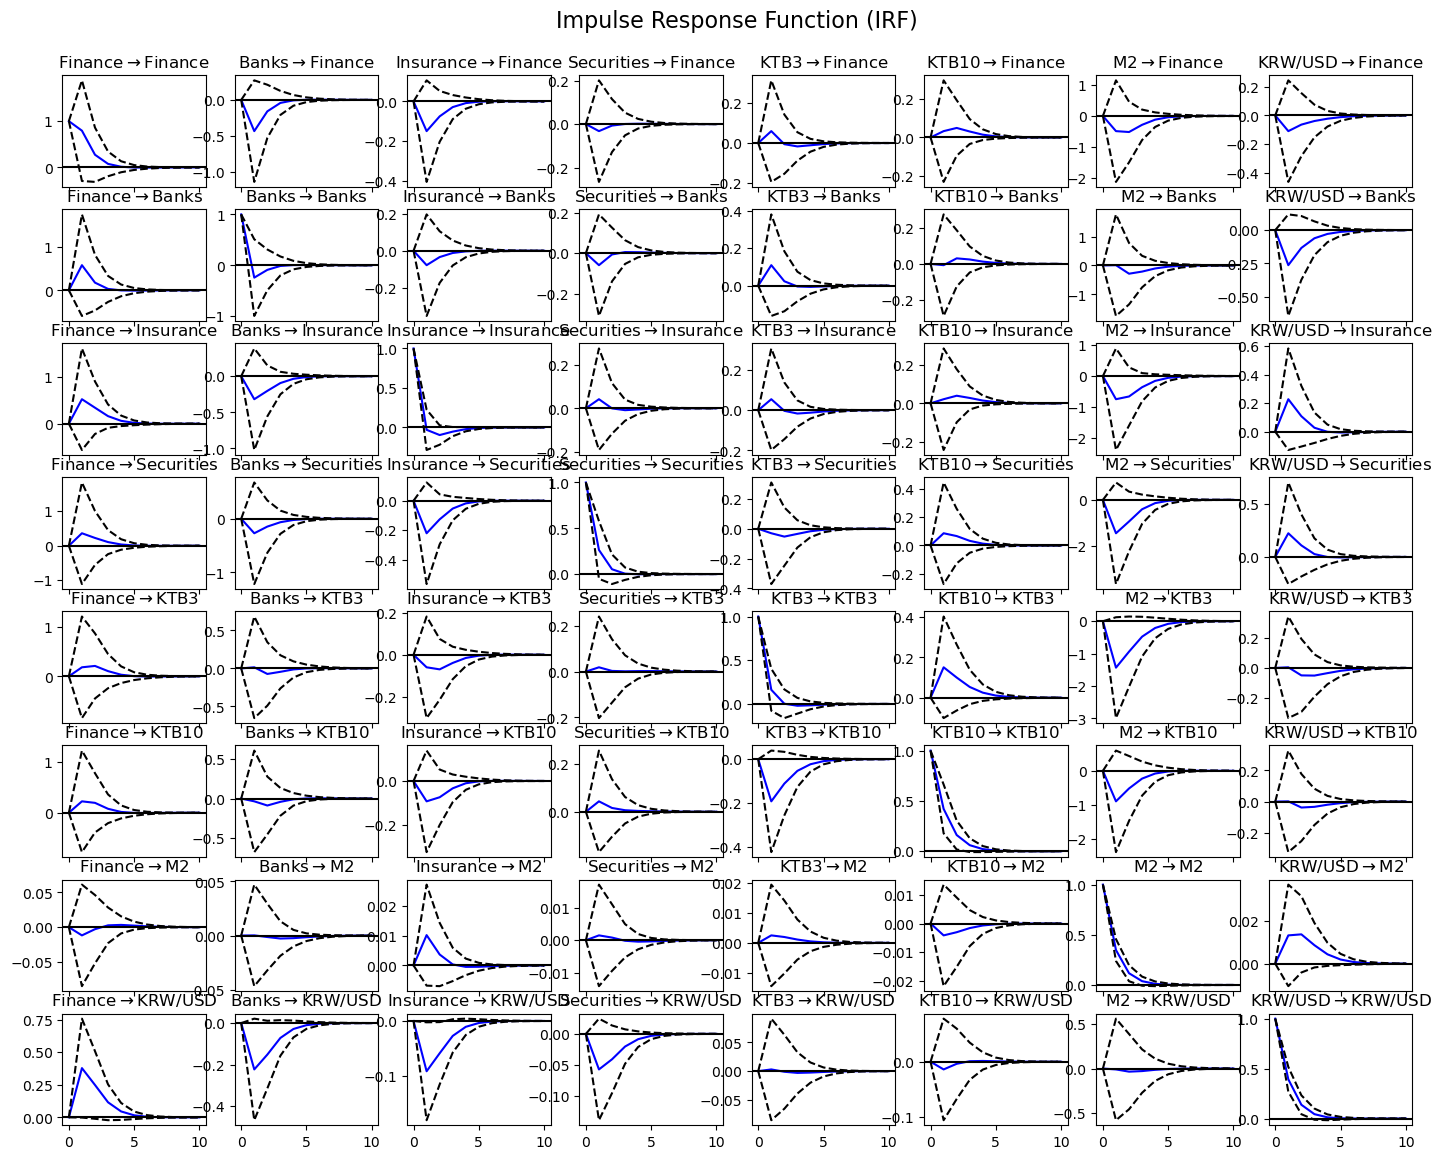

In [27]:
# 🔹 5. Impulse Response Function (IRF) 계산
irf = model.irf(periods=10)  # 10기간 충격 반응 분석

# 🔹 6. 전체 IRF 그래프 출력 (논문 Fig. 1 스타일)
irf.plot(figsize=(15, 12))
plt.suptitle("Impulse Response Function (IRF)", fontsize=16)

# 그래프 저장 (PNG & PDF)
plt.savefig("irf_plot.png", dpi=300, bbox_inches='tight')  # PNG 저장
plt.savefig("irf_plot.pdf", dpi=300, bbox_inches='tight')  # PDF 저장


plt.show()